In [1]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

# new softmax

1.0684035072203402


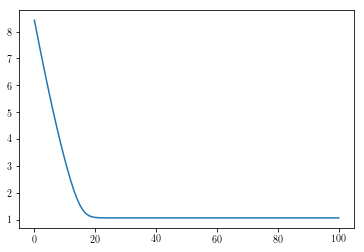

In [5]:
from __future__ import print_function
import numpy as np  
def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of scores.    
    Z: a numpy array of shape (N, C)
    return a numpy array of shape (N, C)
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 1, keepdims = True)
    return A

def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each row of Z is a set of scores.    
    """
    # Z = Z.reshape(Z.shape[0], -1)
    e_Z = np.exp(Z - np.max(Z, axis = 1, keepdims = True))
    A = e_Z / e_Z.sum(axis = 1, keepdims = True)
    return A

# cost or loss function  
def softmax_loss(X, y, W):
    """
    W: 2d numpy array of shape (d, C), 
        each column correspoding to one output node
    X: 2d numpy array of shape (N, d), each row is one data point
    y: 1d numpy array -- label of each row of X 
    """
    A = softmax_stable(X.dot(W))
    id0 = range(X.shape[0])
    return -np.mean(np.log(A[id0, y]))

# W_init = np.random.randn(d, C)

def softmax_grad(X, y, W):
    """
    W: 2d numpy array of shape (d, C), 
        each column correspoding to one output node
    X: 2d numpy array of shape (N, d), each row is one data point
    y: 1d numpy array -- label of each row of X 
    """
    A = softmax_stable(X.dot(W)) # shape of (N, C)
    id0 = range(X.shape[0])
    A[id0, y] -= 1  # A - Y, shape of (N, C)
    return X.T.dot(A)/X.shape[0]
    
def numerical_grad(X, Y, W, loss):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (loss(X, Y, W_p) - loss(X, Y, W_n))/(2*eps)
    return g 

def softmax_fit(X, y, W, lr = 0.01, nepoches = 100, tol = 1e-5, batch_size = 10):
    W_old = W.copy()
    ep = 0 
    loss_hist = [softmax_loss(X, y, W)] # store history of loss 
    N = X.shape[0]
    nbatches = int(np.ceil(float(N)/batch_size))
    while ep < nepoches: 
        ep += 1 
        mix_ids = np.random.permutation(N) # mix data 
        for i in range(nbatches):
            # get the i-th batch
            batch_ids = mix_ids[batch_size*i:min(batch_size*(i+1), N)] 
            X_batch, y_batch = X[batch_ids], y[batch_ids]
            W -= lr*softmax_grad(X_batch, y_batch, W) # update gradient descent 
        loss_hist.append(softmax_loss(X, y, W))
        if np.linalg.norm(W - W_old)/W.size < tol:
            break 
        W_old = W.copy()
    return W, loss_hist 


def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(X.dot(W))
    return np.argmax(A, axis = 1)


d = 100
C = 3 
N = 3000
X = np.random.randn(N, d)
y = np.random.randint(0, C, N) 
W = np.random.randn(d, C) 
# print(y.shape)
# print(loss(X, y, W))
# g1 = grad(X, y, W)
# g2 = numerical_grad(X, y, W, loss)

# # print(g1)
# # print(g2)
# print(np.linalg.norm(g1 - g2)/g1.size)

W, loss_hist = softmax_fit(X, y, W, batch_size = 100, lr= 0.05)
import matplotlib.pyplot as plt

print(loss_hist[-1])
plt.plot(loss_hist)
plt.show() 

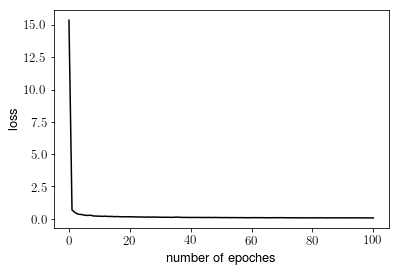

In [18]:
C = 5    # number of classes
N = 500  # number of points per class 
means = [[2, 2], [8, 3], [3, 6], [14, 2], [12, 8]]
cov = [[1, 0], [0, 1]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X3 = np.random.multivariate_normal(means[3], cov, N)
X4 = np.random.multivariate_normal(means[4], cov, N)

X = np.concatenate((X0, X1, X2, X3, X4), axis = 0) # each row is a datapoint
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1) # bias trick 

y = np.asarray([0]*N + [1]*N + [2]*N+ [3]*N + [4]*N)

W_init = np.random.randn(Xbar.shape[1], C)
W, loss_hist = softmax_fit(Xbar, y, W_init, batch_size = 10, nepoches = 100, lr = 0.05)

filename = 'softmax_loss.pdf'
with PdfPages(filename) as pdf:
    plt.plot(loss_hist, 'k')
    plt.xlabel('number of epoches', fontsize = 13)
    plt.ylabel('loss', fontsize = 13)
    pdf.savefig(bbox_inches = 'tight')
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.show() 

In [7]:

xm = np.arange(-2, 18, 0.025)
xlen = len(xm)
ym = np.arange(-3, 11, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()

print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(-1, 1)
yy1 = yy.ravel().reshape(-1, 1)

# print(xx.shape, yy.shape)
XX = np.concatenate(( xx1, yy1, np.ones(( xx.size, 1))), axis = 1)


print(XX.shape)

Z = pred(W, XX)

(1, 448000)
(448000, 3)


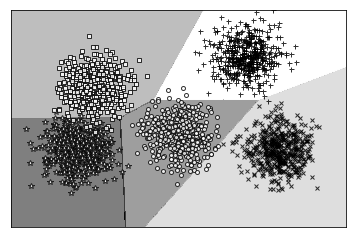

In [17]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
def display(X, label):
#     K = np.amax(label) + 1
    X0 = X[np.where(label == 0)[0]]
    X1 = X[np.where(label == 1)[0]]
    X2 = X[np.where(label == 2)[0]]
    X3 = X[np.where(label == 3)[0]]
    
    plt.plot(X0[:, 0], X0[:, 1], 'w*', mec = 'k', markersize = 6, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'wo', mec = 'k', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'ws', mec = 'k', markersize = 4, alpha = .8)
    plt.plot(X3[:, 0], X3[:, 1], 'wx', mec = 'k', markersize = 4, alpha = .8)
    plt.plot(X4[:, 0], X4[:, 1], 'k+', mec = 'k', markersize = 5, alpha = .8)


#     plt.axis('off')
    plt.plot()
    

Z = Z.reshape(xx.shape)
filename = 'softmax_5class.pdf'
with PdfPages(filename) as pdf:
    CS = plt.contourf(xx, yy, Z, 200, cmap='gray', alpha = .5)


    plt.xlim(-2, 18)
    plt.ylim(-3, 11)
    plt.xticks(())
    plt.yticks(())
    # plt.axis('equal')
    display(X, y)
    pdf.savefig(bbox_inches = 'tight')
    plt.show()

# Softmax cho MNIST

In [69]:
import numpy as np 
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
mnist = fetch_mldata('MNIST original', data_home='../../data/')

X = mnist.data 
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

model = LogisticRegression(C = 1e5,
        solver = 'lbfgs', multi_class = 'multinomial') # C is inverse of lam 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred.tolist())))

Accuracy 92.19 %


In [70]:
# one-vs-rest logistic regression 
import numpy as np 
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
mnist = fetch_mldata('MNIST original', data_home='../../data/')

X = mnist.data 
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

model = LogisticRegression(C = 1e5,
        solver = 'lbfgs', multi_class = 'ovr') # C is inverse of lam 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred.tolist())))

Accuracy 91.27 %
